In [ ]:
!pip install Arabic-Stopwords
!pip install openpyxl
!pip install ktrain

In [ ]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer

import arabicstopwords.arabicstopwords as stp
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

import os


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
import os
import codecs
import pandas as pd
topics = os.listdir('/content/drive/MyDrive/Akhbarona')
dataset,y=[],[]
for topic in topics:
  articles = [article for article in os.listdir(f'/content/drive/MyDrive/Akhbarona/{topic}')]
  for article in articles:
    str1= ""
    f=codecs.open(f'/content/drive/MyDrive/Akhbarona/{topic}/{article}', 'r',encoding='utf-8')
    dataset.append(str1.join(f.readlines()))
    y.append(topic)
df = pd.DataFrame(list(zip(dataset,y)),columns=['text','class'])
df.to_csv('/content/drive/MyDrive/Akhbarona.csv',encoding='utf-8')
df['text'][2]
'''

'أحرز المنتخب الروسي لكرة القدم الشاطئية لقب كأس العالم في اللعبية بعد أن أطاح بنظيره البرازيلي 12-8 في البطولة التي جرت منافساتها في مدينة رافينا الإيطالية .وخفقت بريق نجوم السامبا الذين اعتادو حصد اللقب العالمي أمام المهارات الفنية للدب الروسي . وحجزت البرتغال المركز الثالث على حساب السلفادور بنتيجة 3-2 .'

In [ ]:
data= pd.DataFrame(columns=['News','Type'])
df=pd.read_csv('/content/drive/MyDrive/Akhbarona.csv')
data['News']=df['text']
data['Type']=df['class']
data

,News,Type
0,حقق فريق مانشستر سيتي حامل اللقب فوزه السادس ع...,Sports
1,يواجه هرتا برلين اختباراً صعباً عندما يحل غدا ...,Sports
2,أحرز المنتخب الروسي لكرة القدم الشاطئية لقب كأ...,Sports
3,أحرز الثنائي الإسباني فيرناندو إشافاري وأنتون ...,Sports
4,ألهب النجم الفرنسي السابق زين الدين زيدان حماس...,Sports
...,...,...
3495,كشفت شركة سيمانتيك أمس عن نتائج تقريرها حالة م...,Tech
3496,أعلنت مايكروسوفت أمس أنها ستكشف النقاب بالتعاو...,Tech
3497,أعلنت شركة بيفورت PAYFORT بوابة المدفوعات الإل...,Tech
3498,"دبي - ""الخليج"":أعلنت ""بروسيرا نتوركس""، الشركة ...",Tech


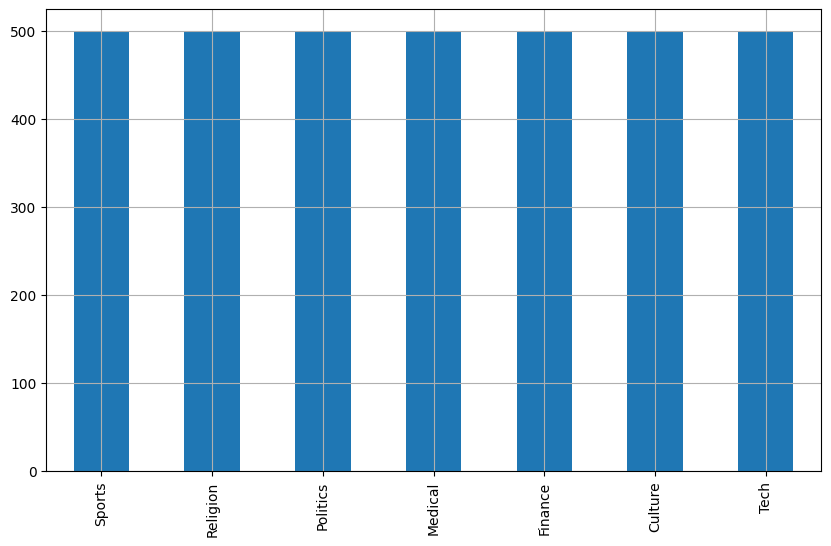

In [ ]:
data['Type'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()

In [ ]:
stop_words = stopwords.words('arabic')

In [ ]:
def text_processing(text):
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)

    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)

    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)

    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    # tokenize the words using nltk word tokenizer and remove the stop words using nltk package's english stop words
    text = ' '.join([word for word in word_tokenize(text) if word not in stp.stopwords_list()])

    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    # lemmatizer using WordNetLemmatizer from nltk package
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    return text

In [ ]:
final_data = data.copy()
final_data.News = final_data.News.apply(lambda text: text_processing(str(text)))

In [ ]:
le = LabelEncoder()
final_data['Type'] = le.fit_transform(final_data['Type'])

In [ ]:
final_data.head()

,News,Type
0,حقق فريق مانشستر سيتي حامل اللقب فوزه السادس ا...,5
1,يواجه هرتا برلين اختبارا صعبا يحل السبت ضيفا ش...,5
2,أحرز المنتخب الروسي لكرة القدم الشاطئية لقب كأ...,5
3,أحرز الثنائي الإسباني فيرناندو إشافاري وأنتون ...,5
4,ألهب النجم الفرنسي السابق زين الدين زيدان حماس...,5


### Classification with Classifier Model (Naive Bayes)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
corpus = []
for sentence in final_data['News']:
    corpus.append(sentence)
corpus[0:2]

['حقق فريق مانشستر سيتي حامل اللقب فوزه السادس التوالي الدوري الإنجليزي الممتاز لكرة القدم بتغلبه ضيفه كريستال بالاس بثلاثة أهداف نظيفة المرحلة السابعة عشرة المسابقة وبخلاف تحقيق الفوز السادس التوالي والثاني عشر الموسم الحالي سيتي حقق فوزه رقم 23 ملعبه 27 مباراة بقية المباريات تعادل مانشستر يونايتد مضيفه استون فيلا 11 وفاز ساوثمبتون ضيفه إيفرتون 3 صفر ووست هام يونايتد ضيفه ليستر سيتي 2 صفر وكوينز بارك رينجرز ضيفه وست بروميتش البيون 32 وتوتنهام ضيفه بيرنلي 21 وخسر هال سيتي يد ضيفه سوانزي سيتي صفر1 وتقاسم سيتي غريمه تشيلسي صدارة المسابقة برصيد 39 نقطة تفوق تشيلسي بفارق الأهداف البلوز بوسعه ينفرد مجددا بالصدارة فاز ملعب ستوك سيتي الاثنين الجانب الآخر تجمد رصيد كريستال بالاس 16 نقطة المركز الخامس عشر ويدين سيتي بالفضل الفوز لجناحه الإسباني ديفيد سيلفا سجل الهدفين الأول والثاني الدقيقتين 49 و61 تكفل النجم الإيفواري يايا توريه بتسجيل الهدف الثالث الدقيقة 81 وقدم كريستال بالاس أداء جيدا الشوط الأول وسيطر مجريات اللعب 25 دقيقة بخلاف كانت السيطرة مطلقة لسيتي الفريق يسجل هدف عبر محاولات سيلفا وا

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
nb_score = accuracy_score(y_test, y_pred)
nb_score

## RNN, LSTM, GRU

#### Data Preparation

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 13000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [ ]:
fd = final_data['News'].apply(lambda text: str(text))

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(fd.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 126058 unique tokens.


In [ ]:
X_final = tokenizer.texts_to_sequences(fd.values)
X_final = pad_sequences(X_final, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_final.shape)

Shape of data tensor: (3500, 250)


In [ ]:
Y_final = pd.get_dummies(final_data['Type']).values
print('Shape of label tensor:', Y_final.shape)

Shape of label tensor: (3500, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2345, 250) (2345, 7)
(1155, 250) (1155, 7)


### RNN

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_final.shape[1]))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(7, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64
rnn_history = rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)


In [ ]:
rnn_accuracy = rnn_model.evaluate(X_test,y_test)
print('RNN Model Evaluation\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(rnn_accuracy[0],rnn_accuracy[1]))

### LSTM

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_final.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(7, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

lstm_history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

In [ ]:
lstm_accuracy = lstm_model.evaluate(X_test,y_test)
print('LSTM Model Evaluation\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(lstm_accuracy[0],lstm_accuracy[1]))

### GRU

In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_final.shape[1]))
gru_model.add(SpatialDropout1D(0.2))
gru_model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(7, activation='softmax'))
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/5
382/382 [==============================] - 241s 625ms/step - loss: 0.8177 - accuracy: 0.7033 - val_loss: 0.2785 - val_accuracy: 0.9175
Epoch 2/5
162/382 [===========>..................] - ETA: 2:08 - loss: 0.2405 - accuracy: 0.9268

In [ ]:
gru_accuracy = gru_model.evaluate(X_test, y_test)
print('GRU Model Evaluation\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(gru_accuracy[0],gru_accuracy[1]))

## Transformers

### BERT

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer
from tqdm.auto import tqdm
from transformers import TFBertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

#### Data Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data['News'], final_data['Type'], test_size=0.25, random_state=42)

In [ ]:
token = tokenizer.encode_plus(
    X_train.iloc[0],
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [ ]:
X_input_ids = np.zeros((len(X_train), 256))
X_attn_masks = np.zeros((len(X_train), 256))

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(X_train, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [ ]:
train_labels = np.zeros((len(y_train), 7))
train_labels[np.arange(len(y_train)), y_train.values] = 1 # one-hot encoded target tensor

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, train_labels))
dataset = dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset
dataset = dataset.shuffle(35180).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [ ]:
p = 0.8
train_size = int((len(X_train))*p)
train_size

2100

In [ ]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

#### Build BERT Model

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = bert_model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(7, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

bert_classification_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
bert_classification_model.summary()

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
bert_classification_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
hist = bert_classification_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

Epoch 1/3
137/164 [========================>.....] - ETA: 16:06 - loss: 1.7631 - accuracy: 0.2860

#### Evaluate the Model

In [ ]:
def generate_test_data(df, ids, masks, tokenizer):
    result = []
    for i, text in tqdm(enumerate(df)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )

        processed_data = {
        'input_ids': tf.cast(tokenized_text.input_ids, tf.float64),
        'attention_mask': tf.cast(tokenized_text.attention_mask, tf.float64),
        }
        result.append(processed_data)
    return result

In [ ]:
test_token = tokenizer.encode_plus(
    X_test.iloc[0], #
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [ ]:
X_input_ids_test = np.zeros((len(X_test), 256))
X_attn_masks_test = np.zeros((len(X_test), 256))
processed_data = generate_test_data(X_test, X_input_ids_test, X_attn_masks_test, tokenizer)

In [ ]:
def get_predictions(bert_model, processed_data):
    classes=['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']
    probs = []
    for data in processed_data:
        prob = bert_model.predict(data)[0]
        prob = classes[np.argmax(prob)]
        probs.append(prob)

    classes = []
    for prob in probs:
        if prob == 'Culture':
            classes.append(0)
        if prob == 'Finance':
            classes.append(1)
        if prob == 'Medical':
            classes.append(2)
        if prob == 'Politics':
            classes.append(3)
        if prob == 'Religion':
            classes.append(4)
        if prob == 'Sports':
            classes.append(5)
        if prob == 'Tech':
            classes.append(6)
    return classes

In [ ]:
y_pred = get_predictions(bert_classification_model, processed_data)

In [ ]:
bert_score = accuracy_score(y_pred, y_test)
bert_score

#### Some test Cases

In [ ]:
def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = 'احرز محمد صلا هدفا رائعا فى شباك تشيلسى بعد انا قام بمراوغة عدة لاعبين ثم سدد تسديدة قوية سكنت مرمى الحارس مندى الذى لم يستطع الوصول الى الكرة وقام بمشاهدتها'
processed_data_test_1 = prepare_data(input_text, tokenizer)
result = make_prediction(bert_classification_model, processed_data=processed_data_test_1)
print(f"Predicted News: {result}")

In [ ]:
input_text = 'حذرت الرابطة الألمانية لأطباء الأطفال والمراهقين من أن السعال الشديد ينذر بإصابة الطفل بما يعرف بالخُناق، الذي يندرج ضمن أمراض المسالك التنفسية...'
processed_data_test_2 = prepare_data(input_text, tokenizer)
result = make_prediction(bert_classification_model, processed_data=processed_data_test_2)
print(f"Predicted News: {result}")

### DistilBERT

In [ ]:
# !pip install ktrain

In [ ]:
import ktrain
from ktrain import text

#### Data Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data['News'], final_data['Type'], test_size=0.25, random_state=42)

In [ ]:
classes=['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']

In [ ]:
trans = text.Transformer('distilbert-base-cased', maxlen=512, class_names = classes)

In [ ]:
train_data = trans.preprocess_train(X_train.values, y_train.values)
test_data = trans.preprocess_test(X_test.values, y_test.values)

#### Build Model

In [ ]:
distilBERT_model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(distilBERT_model, train_data=train_data, val_data=test_data, batch_size=16)

In [ ]:
learner.fit_onecycle(1e-4, 3)

#### Evaluate the Model

In [ ]:
distilBERT_acc = learner.validate()

In [ ]:
distilBERT_acc

In [ ]:
distilBERT_accuracy = (distilBERT_acc.diagonal()/distilBERT_acc.sum(axis=0)).sum() / 7

### RoBERTa

#### Data Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data['News'], final_data['Type'], test_size=0.3, random_state=42)

In [ ]:
trans_roberta = text.Transformer('roberta-base', class_names = classes)

In [ ]:
train_data_roberta = trans_roberta.preprocess_train(X_train.values, y_train.values)
test_data_roberta = trans_roberta.preprocess_test(X_test.values, y_test.values)

#### Build the Model

In [ ]:
roberta_model = trans_roberta.get_classifier()

In [ ]:
roberta_learner = ktrain.get_learner(roberta_model, train_data=train_data_roberta, val_data=test_data_roberta, batch_size=16)

In [ ]:
roberta_learner.fit_onecycle(1e-4, 3)

#### Evaluate the Model

In [ ]:
roberta_validation = roberta_learner.validate()

In [ ]:
roberta_accuracy = (roberta_validation.diagonal()/roberta_validation.sum(axis=0)).sum() / 7
roberta_accuracy

### Conclusion

In [ ]:
nb_acc = nb_score * 100
rnn_acc = rnn_accuracy[1] * 100
lstm_acc = lstm_accuracy[1] * 100
gru_acc = gru_accuracy[1] * 100
bert_score = bert_score * 100
dist_score = distilBERT_accuracy * 100
roberta_score = roberta_accuracy * 100

In [ ]:
import seaborn as sns
methods = ["Naive Bayes","RNN", "LSTM", "GRU", "BERT", "DistilBERT", "RoBERTa"]
accuracy = [nb_acc, rnn_acc, lstm_acc, gru_acc, bert_score, dist_score, roberta_score]

sns.set()
plt.figure(figsize=(12,6))
plt.title("Models Summary")
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]))

plt.tight_layout()